# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
pwd

In [228]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.axes.Axes. import ylim
import pandas as pd
import numpy as np
import requests
import time
import datetime
from datetime import date, datetime, timezone
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Weather_File/weather_API_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'matplotlib.axes.Axes'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
# Will need fo(r date stamps on plots and the text files for documentation purposes
today = (date.today()).strftime("%m/%d/%y")
print("Today's date:", today)

Today's date: 08/09/20


In [4]:
# For total amount of queries listed on data set. 
equivalent = len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#  URL
url="http://api.openweathermap.org/data/2.5/weather?"

# Will look like http://api.openweathermap.org/data/2.5/weather?appid={your api key}&units=imperial&q={city name}
query_url=url+"appid="+ weather_api_key+"&units=imperial"+"&q=" #+city

# Make log for cities with ID as text
printlog = open('Weather_File/weather_data_log.txt', 'w')

In [6]:
# # Check for unambigous data recommended by Weather Map API and display json format
# city_id = input("id: ") # for various id's for unambigous data

# # Look's like api.openweathermap.org/data/2.5/weather?id={city id}&appid={your api key}
# id_url= url + "id=" + city_id + "&appid="+ weather_api_key

# json_data = requests.get(id_url).json()
# json_data

In [7]:
# # Save for later use when restarting kernels
# wid = int(json_data["id"])
# wid

In [8]:
#create row counter and lists
counter=0
set_num=1
cid = 0
weather_list=[]

# # city_ids = [] 
# clouds = []
# country = []
# wdate = []
# humidity = []
# latitude = []
# longitude = []
# max_temp = []
# wind_speed = []
# city_list=[]


In [9]:
print(f"Start Data Retrieval on {today} estimated to be {equivalent}")
printlog.write(f"Start Data Retrieval on {today} estimated to be {equivalent}")
print('-'*40 + "\n")

# call = query_url + city # create variable to update city in query!

for city in cities:
    # To append city Id's because it is an integer value
    call = query_url + city # create variable to update city in query!
    response = (requests.get(call)).json()

#     # Want to make sure the data has enough time to properly be appended by 1 second
#     time.sleep(1)
    
    # update record number and set number / note: easier to add to match to length of cities
    if counter>=50: 
        counter=1
        set_num+=1
        
    else:
        counter+=1

        
#     # For Id statement    
#     cid = int(response['id'])

    
#     # Use variables to prevent list from being printed, group by 50, also see url changes!   
#     print(f"Currently Processing record number {counter} of Set {set_num} | {city} with City ID: {cid}") #| the query URL: {call}\n")

    
#     # Want to see documentation of all cities with ID in the weather map API as a text file for back up. 
#     printlog.write(f"Currently Processing record number {counter} of Set {set_num} | {city} with City ID: {cid}) #| the query URL: {call}\n") 
#     pass  

    #
    try:
        
        #create dictionary within a list to append data from openweather
        weather_list.append({"City":response["name"],
                             "Country":response['sys']['country'],
                             "Latitude":response['coord']['lat'],
                             "Longitude":response['coord']['lon'],
                             "Date":response['dt'],
                             "Cloudiness":response['clouds']['all'],
                             "Humidity":response['main']['humidity'],
                             "Max Tempature":response['main']['temp_max'],
                             "Wind Speed":response['wind']['speed']})
        

#         # The list appends the values and append response to print out on to datframe
#         #city_ids.append(cid)
#         country.append(response['sys']['country'])
#         latitude.append(response['coord']['lat'])
#         longitude.append(response['coord']['lon'])
        
#         # wdate.append(datetime.fromtimestamp(response['dt']).strftime('%m/%d/%y')) #Format date????
#         wdate.append(response['dt'])
#         clouds.append(response['clouds']['all'])
#         humidity.append(response['main']['humidity'])
#         max_temp.append(response['main']['temp_max'])
#         wind_speed.append(response['wind']['speed'])
#         city_list.append(city) 
        
        # For Id statement    
        cid = int(response['id'])

    
        # Use variables to prevent list from being printed, group by 50, also see url changes!   
        print(f"Currently Processing record number {counter} of Set {set_num} | {city} with City ID: {cid}") #| the query URL: {call}\n")

    
        # Want to see documentation of all cities with ID in the weather map API as a text file for back up. 
        printlog.write(f"Currently Processing record number {counter} of Set {set_num} | {city} with City ID: {cid}) #| the query URL: {call}\n") 
        pass  
        
    except:
        print(f"City not found. Skipping... \n")
        
         # Want to see documentation of all cities with ID not in the weather map API.
        printlog.write(f"City not found. Skipping... \n")
        
#         # "City ID" : city_ids,        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
#         #city_ids.append(None)
#         city_list.append(None)
#         country.append(None)
#         latitude.append(None)
#         longitude.append(None)
#         clouds.append(None)
#         wdate.append(None)
#         humidity.append(None)
#         max_temp.append(None)
#         wind_speed.append(None)

  
print('-'*40 + '\n')
print("Process complete ... \n")
# Close file after loop
printlog.close()

Start Data Retrieval on 08/09/20 estimated to be 604
----------------------------------------

Currently Processing record number 1 of Set 1 | ushuaia with City ID: 3833367
Currently Processing record number 2 of Set 1 | avarua with City ID: 4035715
City not found. Skipping... 

Currently Processing record number 4 of Set 1 | lasa with City ID: 3175096
Currently Processing record number 5 of Set 1 | padang with City ID: 1633419
Currently Processing record number 6 of Set 1 | aklavik with City ID: 5882953
Currently Processing record number 7 of Set 1 | almunecar with City ID: 2521847
Currently Processing record number 8 of Set 1 | barrow with City ID: 5880054
Currently Processing record number 9 of Set 1 | oussouye with City ID: 2246901
Currently Processing record number 10 of Set 1 | nanortalik with City ID: 3421765
City not found. Skipping... 

City not found. Skipping... 

Currently Processing record number 13 of Set 1 | boda with City ID: 2388614
Currently Processing record number 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Consistent data to work with now in dataframe then count for accuracy: number = len(cities)
city_df = pd.DataFrame(weather_list)
city_df.count()

City             554
Country          554
Latitude         554
Longitude        554
Date             554
Cloudiness       554
Humidity         554
Max Tempature    554
Wind Speed       554
dtype: int64

In [12]:
city_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Tempature,Wind Speed
0,Ushuaia,AR,-54.80,-68.30,1597015548,75,80,35.60,25.28
1,Avarua,CK,-21.21,-159.78,1597015548,95,78,77.00,8.05
2,Laas,IT,46.62,10.70,1597015548,5,87,60.80,1.92
3,Padang,ID,-0.95,100.35,1597015549,98,72,77.68,4.18
4,Aklavik,CA,68.22,-135.01,1597014983,90,76,53.60,8.05


In [13]:
# I appeneded everything regardless of value to make sure it went through all city names, now drop
city_df = city_df.dropna()

In [14]:
# Total rows per column after drop if any
city_df.count()

City             554
Country          554
Latitude         554
Longitude        554
Date             554
Cloudiness       554
Humidity         554
Max Tempature    554
Wind Speed       554
dtype: int64

In [50]:
city_df['Date'] = (pd.to_datetime(city_df['Date'], errors='coerce')
                          .dt.strftime('%m/%d/%y')
                          .replace(timezone.utc))

In [51]:
city_df



,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Tempature,Wind Speed
0,Ushuaia,AR,-54.80,-68.30,01/01/70,75,80,35.60,25.28
1,Avarua,CK,-21.21,-159.78,01/01/70,95,78,77.00,8.05
2,Laas,IT,46.62,10.70,01/01/70,5,87,60.80,1.92
3,Padang,ID,-0.95,100.35,01/01/70,98,72,77.68,4.18
4,Aklavik,CA,68.22,-135.01,01/01/70,90,76,53.60,8.05
...,...,...,...,...,...,...,...,...,...
549,Paragominas,BR,-2.97,-47.48,01/01/70,93,51,78.84,3.24
550,Draguignan,FR,43.53,6.47,01/01/70,18,53,75.00,2.24
551,São Bernardo,BR,-3.36,-42.42,01/01/70,0,75,76.44,6.33
552,Wasilla,US,61.58,-149.44,01/01/70,40,63,66.20,9.17


In [52]:
# Consistent data to work with, in case anything happens, process runs for too long
city_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [53]:
#  Get the indices of cities that have humidity over 100%
h = city_df['Humidity']
h.max() # if value greater than 100 then write code below

100

In [54]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [55]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv if humidity above 100
# city_df.to_csv("Weather_File/clean_weather.csv")

In [56]:
# Create function 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

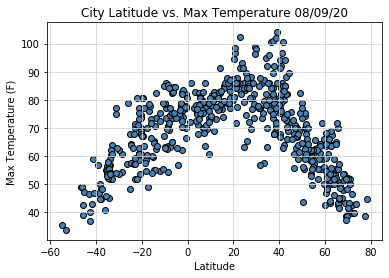

In [57]:
plt.scatter(city_df["Latitude"], city_df["Max Tempature"] ,edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

In [58]:
plt.savefig('Weather_File/Latitude_vs_Temperature Plot')

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

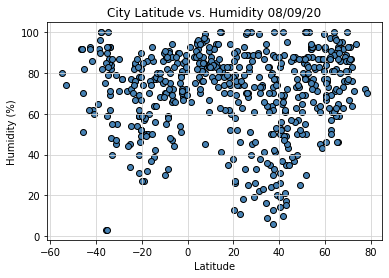

In [59]:
plt.scatter(city_df["Latitude"],city_df["Humidity"],edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Humidity {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

In [60]:
plt.savefig("Weather_File/Lat_vs_Humidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

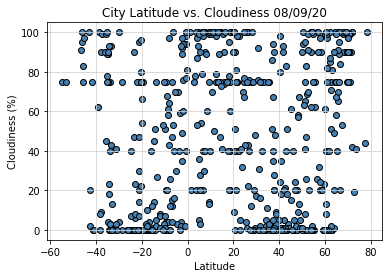

In [61]:

plt.scatter(city_df["Latitude"],city_df["Cloudiness"],edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Weather_File/LatvsCloudiness.png")


In [62]:
# Save the figure
plt.savefig("Weather_File/LatitudeVsCloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

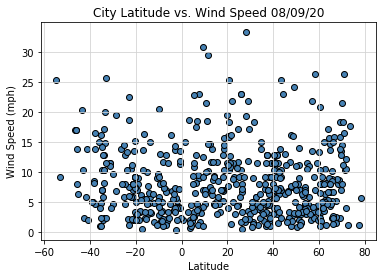

In [63]:
plt.scatter(city_df["Latitude"],city_df["Wind Speed"],edgecolors="black",facecolors="steelblue")
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

In [64]:
plt.savefig("Weather_File/LatvsWindSpeed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [262]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression (x_label, y_label, X, Y, title, legend, top, bottom):
    (a, b, r_value, p_value, std_err)  = linregress(X, Y)
    print(f"The r-squared is: {r_value}")
    y = X * a  + b
    Yy = f"y = {(round(a,2))}x +  {round(b,2)}"
    plt.plot(X, y, '-r')
    plt.annotate(Yy,legend,fontsize=15,color="red")
    plt.scatter(X,Y, edgecolors="black",facecolors="steelblue")
    plt.ylim(bottom, top)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid (b=True,which="major",axis="both",linestyle="-",color="darkgrey")
    plt.show()
    plt.savefig(f"Weather_File/{title}.png")

In [263]:
# Create Northern and Southern Hemisphere DataFrames
# Latitude -90 = North, Latitude 90 = South
# Horizontal mapping lines on Earth are lines of latitude. They are known as "parallels" of latitude, because they run parallel to the equator. One simple way to visualize this might be to think about having imaginary horizontal "hula hoops" around the earth, with the biggest hoop around the equator, and then progressively smaller ones stacked above and below it to reach the North and South Poles.
north = city_df.loc[city_df["Latitude"] >= 0.0]
north.reset_index(inplace=True)

south = city_df.loc[city_df["Latitude"] < 0.0]
south.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7021316940988365


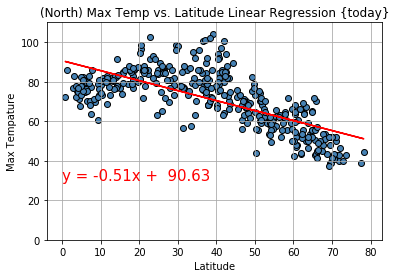

<Figure size 432x288 with 0 Axes>

In [264]:
linear_regression("Latitude", "Max Tempature", north["Latitude"], north["Max Tempature"], "(North) Max Temp vs. Latitude Linear Regression {today}", (0, 30), 110, 0 )  

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7585086247910795


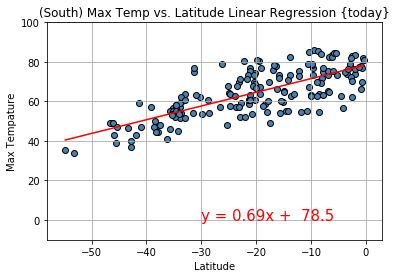

<Figure size 432x288 with 0 Axes>

In [265]:
linear_regression("Latitude", "Max Tempature", south["Latitude"], south["Max Tempature"], "(South) Max Temp vs. Latitude Linear Regression {today}", (-30, 0), 100, -10 )  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.00237685863042812


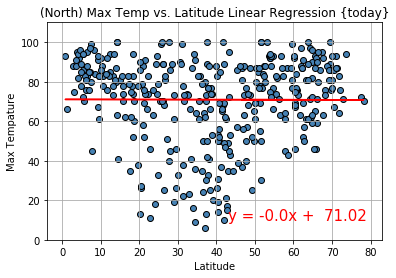

<Figure size 432x288 with 0 Axes>

In [266]:
linear_regression("Latitude", "Max Tempature", north["Latitude"], north["Humidity"], "(North) Humidity vs. Latitude Linear Regression {today}", (43, 10), 110, 0 )  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.05934463544016372


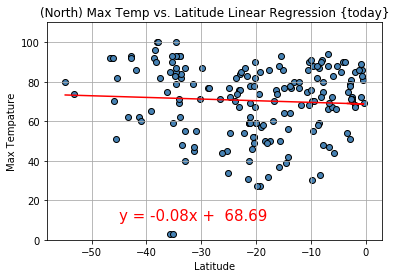

<Figure size 432x288 with 0 Axes>

In [267]:
linear_regression("Latitude", "Max Tempature", south["Latitude"], south["Humidity"], "(North) Max Temp vs. Latitude Linear Regression {today}", (-45,10), 110, 0 )  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.7021316940988365


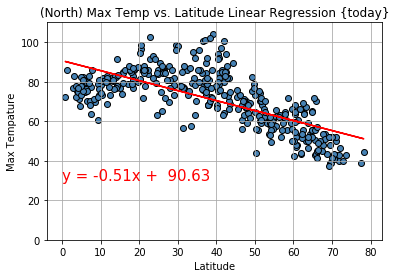

<Figure size 432x288 with 0 Axes>

In [268]:
linear_regression("Latitude", "Max Tempature", north["Latitude"], north["Max Tempature"], "(North) Max Temp vs. Latitude Linear Regression {today}", (0, 30), 110, 0 )  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.09417300596396012


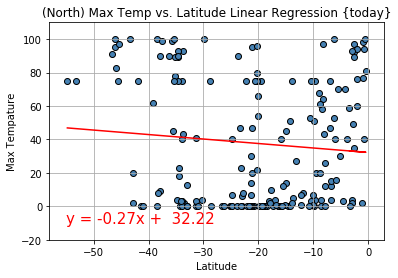

<Figure size 432x288 with 0 Axes>

In [273]:
linear_regression("Latitude", "Max Tempature", south["Latitude"], south["Cloudiness"], "(North) Max Temp vs. Latitude Linear Regression {today}", (-55, -10), 110, -20 )  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
linear_regression("Latitude", "Max Tempature", north["Latitude"], north["Max Tempature"], "(North) Max Temp vs. Latitude Linear Regression {today}", (0, 30), 110, 0 )  

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
linear_regression("Latitude", "Max Tempature", south["Latitude"], south["Max Tempature"], "(North) Max Temp vs. Latitude Linear Regression {today}", (0, 30), 110, 0 )  